<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/Data_Manipulation_with_data_table_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("bikeshare14")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load
library(dplyr)
library(ggplot2)
library(tidyr)

# Specially in this notebook we are going to use data tables
library(data.table)
library(bikeshare14)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




# data.table differences from data.frame


- A data.table is a data.frame. It inherits and builds on top of it.

- data.tables never use or need row names.

# Creating a data.table

In [5]:
# Create the data.table X
X <- data.table(id = c("a", "b", "c"), value = c(0.5, 1.0, 1.5))

# View X
X

id,value
<chr>,<dbl>
a,0.5
b,1.0
c,1.5


# Importing bikes data

## head and str

In [6]:
# Head and columns summary.
head(batrips,2)
str(batrips)

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_id,subscription_type,zip_code
,<int>,<int>,<dttm>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<chr>,<chr>
1,139545,435,2014-01-01 00:14:00,San Francisco City Hall,58,2014-01-01 00:21:00,Townsend at 7th,65,473,Subscriber,94612
2,139546,432,2014-01-01 00:14:00,San Francisco City Hall,58,2014-01-01 00:21:00,Townsend at 7th,65,395,Subscriber,94107


'data.frame':	326339 obs. of  11 variables:
 $ trip_id          : int  139545 139546 139547 139549 139550 139551 139552 139553 139554 139555 ...
 $ duration         : int  435 432 1523 1620 1617 779 784 721 624 574 ...
 $ start_date       : POSIXct, format: "2014-01-01 00:14:00" "2014-01-01 00:14:00" ...
 $ start_station    : chr  "San Francisco City Hall" "San Francisco City Hall" "Embarcadero at Sansome" "Steuart at Market" ...
 $ start_terminal   : int  58 58 60 74 74 74 74 74 57 57 ...
 $ end_date         : POSIXct, format: "2014-01-01 00:21:00" "2014-01-01 00:21:00" ...
 $ end_station      : chr  "Townsend at 7th" "Townsend at 7th" "Beale at Market" "Powell Street BART" ...
 $ end_terminal     : int  65 65 56 39 39 46 46 46 68 68 ...
 $ bike_id          : int  473 395 331 605 453 335 580 563 358 365 ...
 $ subscription_type: chr  "Subscriber" "Subscriber" "Subscriber" "Customer" ...
 $ zip_code         : chr  "94612" "94107" "94112" "92007" ...


In [7]:
# Transform df to data.table
dt_batrips = as.data.table(batrips)

## ncol, nrow, dim

In [8]:
# Get number of columns, rows and dim of batrips
nrow(dt_batrips)
ncol(dt_batrips)
dim(dt_batrips)

[1] 326339

[1] 11

[1] 326339     11

# Subsetting rows in data tables

DT[i, j, by]

In [9]:
# Subset 3 and 4th row
subset_34 = dt_batrips[3:4,]

# Another way to subset rows in data.table. If data.Frame this would subset COLUMNS!
subset_34_2 = dt_batrips[3:4]

# Filter the 1st, 6th and 10th rows
rows_1_6_10 = batrips[c(1, 6, 10)]

# Subset everything except first 5 rows. 
not_5_rows = dt_batrips[-(1:5),]

# Same as except using - or !
not_5_rows_2 = dt_batrips[!(1:5),]

# Select all rows except 1 through 5 and 10 through 15
exclude_some = batrips[-c(1:5, 10:15)]

# Return all but the last 10 rows
all_except_last_10 = dt_batrips[1:(nrow(dt_batrips)-10),]

# Or, instead of nrow() use .N
all_except_last_10_N = dt_batrips[1:(.N-10)]

## Filtering with conditions

In dataframe we need to use df$col_name cond, with data.tables just col_name and condition.

In [ ]:
# Filter all rows where start_station is "5th at Howard"
head(dt_batrips[start_station == "5th at Howard"],2)

# Filter all rows where start_station is "MLK Library" AND duration > 1600
trips_mlk_1600 = dt_batrips[start_station == "MLK Library" & duration > 1600]

# Filter all rows where start_station is "Ryland Park" AND subscription_type is not "Customer"
ryland_park_subscribers = dt_batrips[start_station == "Ryland Park" & subscription_type != "Customer"]

trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_id,subscription_type,zip_code
<int>,<int>,<dttm>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<chr>,<chr>
139554,624,2014-01-01 00:25:00,5th at Howard,57,2014-01-01 00:35:00,Yerba Buena Center of the Arts (3rd @ Howard),68,358,Customer,94941
139555,574,2014-01-01 00:25:00,5th at Howard,57,2014-01-01 00:35:00,Yerba Buena Center of the Arts (3rd @ Howard),68,365,Customer,94941


## 3 functions makes data.table convenient subsetting

### %like%

instead of using grepl(pattern="regex", x=dataframe)

In [ ]:
# Subset all rows where start_station starts with San Francisco
head(dt_batrips[start_station %like% "^San Francisco"],1)

# instead of using grepl(pattern="regex", x=dataframe$col)
head(batrips[grepl("^San Francisco", batrips$start_station),],1)

trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_id,subscription_type,zip_code
<int>,<int>,<dttm>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<chr>,<chr>
139545,435,2014-01-01 00:14:00,San Francisco City Hall,58,2014-01-01 00:21:00,Townsend at 7th,65,473,Subscriber,94612


,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_id,subscription_type,zip_code
,<int>,<int>,<dttm>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<chr>,<chr>
1,139545,435,2014-01-01 00:14:00,San Francisco City Hall,58,2014-01-01 00:21:00,Townsend at 7th,65,473,Subscriber,94612


In [ ]:
# Filter all rows where end_station contains "Market"
any_markets = dt_batrips[end_station %like% "Market"]

# Filter all rows where end_station ends with "Market"
end_markets = dt_batrips[end_station %like% "Market$"]

### %between%

instead of using df[df%row >= x, df%row <= x,]

In [ ]:
# duration between 2000 and 3000 INCLUDED.
dim(dt_batrips[duration %between% c(2000,3000)])

[1] 3600   11

### %in% and %chin%

instead of using df[col_name %in% c(strings),]
chin is much faster but only for characters.

In [ ]:
# Using %in%
# Filter all rows where trip_id is 588841, 139560, or 139562
filter_trip_ids = dt_batrips[trip_id %in% c(588841, 139560, 139562)]

# Using %chin%
# Filter all rows with specific start stations
two_stations = dt_batrips[start_station %chin% c("San Francisco City Hall", "Embarcadero at Sansome")]

# Subsetting columns in data tables

DT[i, j, by]

Filtering by column numbers is not a good practice. It should be done by name.

If we filter only one row the class of the frame is still a data.table. If dataframe it become a vector.

In [ ]:
head(dt_batrips[,c("start_station", "duration")],2)

# Deselect start_terminal and end_terminal columns or use -
drop_terminal_cols = dt_batrips[, !c("start_terminal", "end_terminal")]

# or instead of using a vector c(), use list with no quotes.
head(dt_batrips[,list(start_station, dur=duration)],2)

# .() same as list()
head(dt_batrips[,.(start_station, dur=duration)],2)

#If you don't wrap the column name either in quotes or inside list(), the result is a vector.
head(dt_batrips[,start_station],2)

start_station,duration
<chr>,<int>
San Francisco City Hall,435
San Francisco City Hall,432


start_station,dur
<chr>,<int>
San Francisco City Hall,435
San Francisco City Hall,432


start_station,dur
<chr>,<int>
San Francisco City Hall,435
San Francisco City Hall,432


[1] "San Francisco City Hall" "San Francisco City Hall"

# Computing on columns

## Filtering rows, summarizing on columns

In [ ]:
# Calculate median duration using the j argument
dt_batrips[, median(duration)]

# Get median and sum of duration after filtering
dt_batrips[end_station == "Market at 10th" & subscription_type == "Subscriber", c(median(duration), sum(duration))]

[1] 511

[1]     651 5265391

In [ ]:
# Get median, sum and nrows after filtering with chin
dt_batrips[end_station %chin% c("Market at 10th", "^San"),.(median_dur = median(duration), sum_dur = sum(duration), count = .N)]

median_dur,sum_dur,count
<int>,<int>,<int>
683,11489582,8559


## Filtering rows and PLOTING

min_dur,max_dur
<int>,<int>
62,499


$breaks
 [1]  50 100 150 200 250 300 350 400 450 500

$counts
[1]   28   15  792 2042  920  314  314  497  538

$density
[1] 1.025641e-04 5.494505e-05 2.901099e-03 7.479853e-03 3.369963e-03
[6] 1.150183e-03 1.150183e-03 1.820513e-03 1.970696e-03

$mids
[1]  75 125 175 225 275 325 375 425 475

$xname
[1] "duration"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

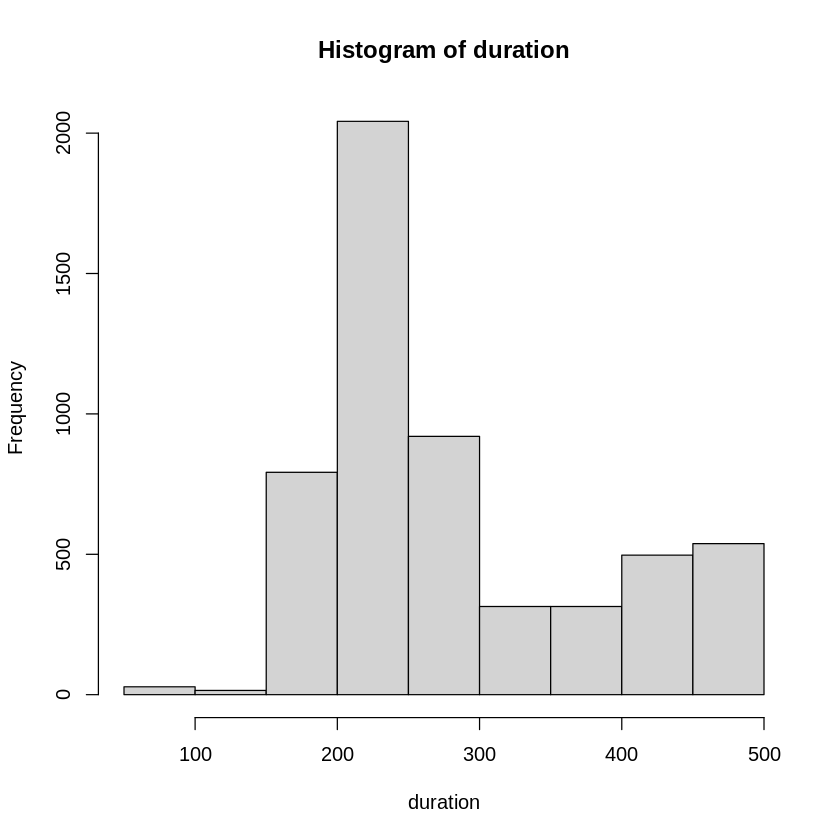

In [ ]:
dt_batrips[start_station == "Townsend at 7th" & duration < 500, 
                          .(min_dur = min(duration), max_dur = max(duration))]

# Plot the histogram of duration based on conditions
dt_batrips[start_station == "Townsend at 7th" & duration < 500, hist(duration)]                          

# Groupwise Operations


In [ ]:
# Compute the mean duration for every start_station
head(dt_batrips[, .(mean_duration = mean(duration)), by = start_station],2)

start_station,mean_duration
<chr>,<dbl>
San Francisco City Hall,1893.936
Embarcadero at Sansome,1418.182


## Grouping by two variables and computing on the fly

In [ ]:
# Compute the mean duration grouped by start_station and month
mean_start_station <- dt_batrips[, .(mean_duration = mean(duration)), by = .(start_station, month(start_date))]

head(mean_start_station, 3)

start_station,month,mean_duration
<chr>,<int>,<dbl>
San Francisco City Hall,1,1548.2591
Embarcadero at Sansome,1,952.1756
Steuart at Market,1,757.2448


In [ ]:
# Compute min and max duration grouped by start station, end station, and month
aggregate_min_max <- dt_batrips[, .(min_duration = min(duration), max_duration = max(duration)), 
                             by = .(start_station, end_station, month(start_date))]

# Chaining [][][]

## Groupby and decrease order

In [ ]:
# Arrange the total trips grouped by start_station and end_station in decreasing order
trips_dec <- dt_batrips[, .N, by = .(start_station, end_station)][order(-N)]

head(trips_dec)

start_station,end_station,N
<chr>,<chr>,<int>
Townsend at 7th,San Francisco Caltrain (Townsend at 4th),3158
San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,2937
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,2826
2nd at Townsend,Harry Bridges Plaza (Ferry Building),2330
Market at 10th,San Francisco Caltrain (Townsend at 4th),2131
Harry Bridges Plaza (Ferry Building),2nd at Townsend,2069


## most popular end station for every start station

In [ ]:
# Compute most popular end station for every start station using trips_dec
# First it has to be ordered then summarize with and_station[1]
popular_end_station <- trips_dec[, .(end_station = end_station[1]), by = start_station]
popular_end_station[1:2]

start_station,end_station
<chr>,<chr>
Townsend at 7th,San Francisco Caltrain (Townsend at 4th)
San Francisco Caltrain 2 (330 Townsend),Townsend at 7th


## five most popular destinations

In [ ]:
# Top five most popular destinations
top_5 <- dt_batrips[, .N, by = end_station][order(-N)][1:5]
top_5

end_station,N
<chr>,<int>
San Francisco Caltrain (Townsend at 4th),33213
Harry Bridges Plaza (Ferry Building),15692
San Francisco Caltrain 2 (330 Townsend),15333
Market at Sansome,14816
2nd at Townsend,14064


In [ ]:
dt_batrips

# Combining i,j and by

## Find the first and last ride for each start_station

In [ ]:
# Simple
dt_batrips[,.(min(start_date), max(start_date)),by=start_station][1:2]

start_station,V1,V2
<chr>,<dttm>,<dttm>
San Francisco City Hall,2014-01-01 00:14:00,2014-12-31 22:06:00
Embarcadero at Sansome,2014-01-01 00:17:00,2014-12-31 22:08:00


In [ ]:
# Find the first and last ride for each start_station
first_last <- dt_batrips[order(start_date), 
                      .(start_date = start_date[c(1, .N)]), 
                      by = start_station]
first_last[1:6]

start_station,start_date
<chr>,<dttm>
San Francisco City Hall,2014-01-01 00:14:00
San Francisco City Hall,2014-12-31 22:06:00
Embarcadero at Sansome,2014-01-01 00:17:00
Embarcadero at Sansome,2014-12-31 22:08:00
Steuart at Market,2014-01-01 00:23:00
Steuart at Market,2014-12-31 16:59:00


# .SD

For each month, find the row corresponding to the shortest trip (by using which.min() on duration).
The result should contain the month, start_station, end_station, start_date, end_date, and duration columns.


In [ ]:

relevant_cols <- c("start_station", "end_station", 
                   "start_date", "end_date", "duration")

# Find the row corresponding to the shortest trip per month
shortest <- dt_batrips[, .SD[which.min(duration)], 
                    by = month(start_date), 
                    .SDcols = relevant_cols]
shortest

month,start_station,end_station,start_date,end_date,duration
<int>,<chr>,<chr>,<dttm>,<dttm>,<int>
1,2nd at Townsend,2nd at Townsend,2014-01-21 13:01:00,2014-01-21 13:02:00,60
2,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain (Townsend at 4th),2014-02-08 14:28:00,2014-02-08 14:29:00,61
3,Mechanics Plaza (Market at Battery),Mechanics Plaza (Market at Battery),2014-03-18 17:50:00,2014-03-18 17:51:00,60
4,South Van Ness at Market,South Van Ness at Market,2014-04-12 04:28:00,2014-04-12 04:29:00,61
5,Market at 10th,Market at 10th,2014-05-14 20:11:00,2014-05-14 20:12:00,60
6,Powell Street BART,Powell Street BART,2014-06-23 17:31:00,2014-06-23 17:32:00,60
7,Powell Street BART,Powell Street BART,2014-07-14 14:09:00,2014-07-14 14:10:00,60
8,Broadway St at Battery St,Broadway St at Battery St,2014-08-15 15:15:00,2014-08-15 15:16:00,60
9,Civic Center BART (7th at Market),Civic Center BART (7th at Market),2014-09-04 10:53:00,2014-09-04 10:54:00,60


# Using .SD (II)
You can also apply a single function to every column specified in .SDcols using lapply(). In this exercise, you will calculate the number of unique start stations and zip codes for each month using uniqueN(). uniqueN() returns the number of unique elements in a column/vector/data.table.# 

In [ ]:
# Find the total number of unique start stations and zip codes per month
unique_station_month <- dt_batrips[, lapply(.SD, uniqueN), 
                                by = month(start_date), 
                                .SDcols = c("start_station", "zip_code")]
unique_station_month

month,start_station,zip_code
<int>,<int>,<int>
1,68,710
2,69,591
3,69,894
4,70,895
5,70,1073
6,70,1028
7,70,1068
8,70,1184
9,70,971


# Efficient way of updating columns

data table uses a new operator := to add/update/delete columns

In [10]:
head(dt_batrips,1)

trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_id,subscription_type,zip_code
<int>,<int>,<dttm>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<chr>,<chr>
139545,435,2014-01-01 00:14:00,San Francisco City Hall,58,2014-01-01 00:21:00,Townsend at 7th,65,473,Subscriber,94612


## Adding a new column

In [11]:
# Add a new column duration_hour to batrips by reference, by dividing the duration column by 3600.

dt_batrips[, duration_hour := duration / 3600]

## Updating an observation

### One value

In [13]:
# Change duration in first row of start_station using the LHS := RHS form
dt_batrips[1, duration := 622]

Updating data.tables is incredibly useful when you are cleaning data. Instead of creating several objects and cluttering up your workspace, you can modify your original data.table directly. This is both cleaner and faster!

### Updating all rows, filtering and changing

In [ ]:
# Replace negative duration values with NA
dt_batrips[duration < 0, duration := NA]

## Adding columns by group

Add a new column by reference called trips_N that is equal to the total number of trips for every start_station.


In [16]:
# Add a new column equal to total trips for every start station
dt_batrips[, trips_N := .N, by = start_station]

Add a new column by reference called duration_mean that is equal to the mean duration of trips for each unique combination of start_station and end_station.

In [20]:
# Add new column for every start_station and end_station
dt_batrips[, duration_mean := mean(duration), by = .(start_station, end_station)]

The format should be: DT[, new_col := expr, by = .(col_1, col_2)]

## Updating columns by group

Add a new column (mean_dur) by reference that is the mean duration of all trips grouped by month (based on start_date). Note that the duration column has missing values.

In [23]:
# Calculate the mean duration for each month
dt_batrips[, mean_dur := mean(duration, na.rm = TRUE), by = month(start_date)]

If the column has missing values: mean(duration, na.rm = TRUE)

Chain a new data.table expression that replaces all missing values in duration with the corresponding mean_dur value.

In [25]:
# Replace NA values in duration with the mean value of duration for that month
dt_batrips[, mean_dur := mean(duration, na.rm = TRUE), 
            by = month(start_date)][is.na(duration), duration := mean_dur]

## Check for na values in column

In [28]:
sum(is.na(dt_batrips$duration))

[1] 0

## Delete column

In [34]:
# Delete the mean_dur column by reference
dt_batrips[, mean_dur := mean(duration, na.rm = TRUE), 
            by = month(start_date)][is.na(duration), 
            duration := mean_dur][, mean_dur := NULL]

## Adding multiple columns (LHS := RHS form)

In [ ]:
# Add columns using the LHS := RHS form
dt_batrips[, c("mean_duration", 
            "median_duration") := .(mean(duration), median(duration)), 
        by = start_station]

## Adding multiple columns (functional form)

In [ ]:
# Add columns using the functional form
dt_batrips[, `:=`(mean_duration = mean(duration), 
               median_duration = median(duration)), 
        by = start_station]

## Combining filtering and adding columns


For all rows where duration is greater than 600, group batrips by start_station and end_station to add a new column (mean_duration) by reference which calculates the mean duration of all trips.

In [37]:
# Add the mean_duration column
dt_batrips[duration>600, mean_duration := mean(duration), by = .(start_station, end_station)]

In [38]:
head(dt_batrips,1)

trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_id,subscription_type,zip_code,duration_hour,trips_N,duration_mean,mean_duration
<int>,<int>,<dttm>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
139545,622,2014-01-01 00:14:00,San Francisco City Hall,58,2014-01-01 00:21:00,Townsend at 7th,65,473,Subscriber,94612,0.1208333,2145,680.1818,1297.219


# Importing flat filer super fast

much faster than read.csv()

In [ ]:
fread("batrips.csv")

## Import with only some features / rows

In [ ]:
# Select "id" and "val" columns
select_columns <- fread("sample.csv", select = c("id", "val"))

# Drop the "val" column
drop_column <- fread(url, drop = "val")

# Import only the first 3 rows
only_data <- fread("sample.csv", nrows = 3)

# Skip the first 7 rows.
only_metadata <- fread("sample.csv", skip = 7)

## Specifying column classes


In [ ]:
# Import using read.csv
read.csv("sample.csv", 
                   colClasses = c(rep("factor", 4), 
                                  "character", "integer", 
                                  rep("numeric", 4)))


# Import using fread
fread("sample.csv", colClasses = list(factor = 1:4, numeric = 7:10))


## Dealing with empty and incomplete lines

In [ ]:
# Import the file correctly with all values.
fread("sample.csv", fill = TRUE)

### Dealing with missing values


In [ ]:
fread("sample.csv", na.strings = c("##", "999"))

# Data writing (Saving data)

In [ ]:
# Write dt to fwrite.txt
fwrite(dt, "fwrite.txt")

## Saving Datetime in ISO format

In [ ]:
# Write batrips_dates to file using "ISO" format
fwrite(batrips_dates, "iso.txt", dateTimeAs = "ISO")

## Or squash datetime format as only integers (removing hyphen, colon, etc)

In [ ]:
# Write batrips_dates to file using "squash" format
fwrite(batrips_dates, "squash.txt", dateTimeAs = "squash")